<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Introducción

En este ejercicio generaremos un árbol de decisión que a través de Regresión, nos permita predecir si una persona sufrirá diabetes o no

## DataSet: Pacientes Enfermos con Diabetes

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: T-Cells (a type of white blood cells)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: thyroid stimulating hormone
* s5: lamotrigine
* s6: blood sugar level

Objetivo: medida cuantitativa de la progresión de la enfermedad.


## Antes de modelar

### Cargamos y preparamos el dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
datos = load_diabetes()

X = pd.DataFrame(datos.data, columns=datos.feature_names)
Y = datos.target

In [2]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [3]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Modelamiento (primeros pasos)

Usando la librería SKLEARN, generaremos un árbol de decisión para regresión

**INDICA QUE SIGNIFICAN CADA UNA DE LAS VARIABLES SIGUIENTES Y QUE INDICAN LAS MEDIDAS DE VERIFICACION USADAS.**

In [4]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(X, Y)

Yhat = mo2.predict(X)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y, Yhat)
mae = mean_absolute_error(Y, Yhat)
R2 = r2_score(Y, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0
MAE:  0.0
R^2:  1.0


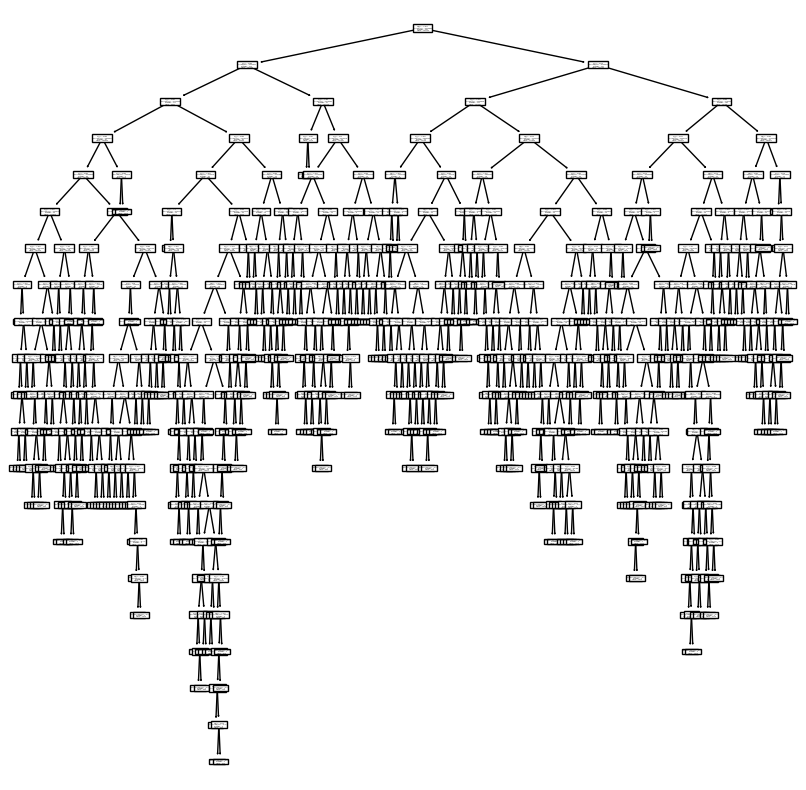

In [6]:
# Visualizamos el árbol generado!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo2)

## Evitando el Overfitting

**INDICA : ¿por qué existe OVERFITTING?**

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  7451.966292134832
MAE:  69.71910112359551
R^2:  -0.24541433181029104


In [9]:
1 - sum((Ytest - Yhat)**2)/sum((Ytest - Ytest.mean())**2)
#sum((Yhat - Ytest.mean())**2)/sum((Ytest - Ytest.mean())**2)

-0.24541433181029104

In [10]:
mo2.feature_importances_

array([0.07462761, 0.00884771, 0.41018576, 0.06627319, 0.04704255,
       0.04722944, 0.04064548, 0.00165802, 0.19448557, 0.10900468])

In [11]:
Xtrain.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Sintonización del modelo

**INDICA :**

¿cómo se realiza esta sintonización?

 ¿qué hiperparámetros se están modificando?

 ¿qué ocurre si ingresas otros valores?....prueba



In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.2701529691548371
{'max_depth': 3, 'min_samples_split': 3}


In [15]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005410,0.002598,0.002073,0.000181,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.341171,0.211817,0.405357,-0.013670,0.406427,0.405004,0.248629,0.389143,0.149438,0.064517,0.260783,0.146506,3
1,0.003316,0.000155,0.001996,0.000071,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.341171,0.211817,0.405357,-0.013670,0.406427,0.405004,0.248629,0.389143,0.243136,0.064517,0.270153,0.142013,1
2,0.003204,0.000113,0.001942,0.000047,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.341171,0.211817,0.405357,-0.013670,0.406427,0.405004,0.248629,0.389143,0.243136,0.064517,0.270153,0.142013,1
3,0.003376,0.000042,0.001914,0.000034,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.461629,0.100081,0.434186,-0.006264,0.318397,0.319520,0.231135,0.468452,-0.057401,0.137902,0.240764,0.181839,4
4,0.003411,0.000083,0.001908,0.000051,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.461629,0.100081,0.434186,-0.006264,0.318397,0.319520,0.231135,0.468452,-0.152652,0.116594,0.229108,0.200002,6
5,0.003682,0.000309,0.002040,0.000116,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.461629,0.100081,0.434186,-0.006264,0.318397,0.319520,0.231135,0.468452,-0.057401,0.116594,0.238633,0.183152,5
6,0.004290,0.001222,0.002027,0.000271,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.299991,0.058108,0.474024,-0.208531,0.356356,0.418189,0.236886,0.334780,-0.076478,-0.102998,0.179033,0.229685,7
7,0.004188,0.000770,0.002909,0.002813,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.299244,0.058108,0.474024,-0.239220,0.356356,0.418189,0.200413,0.334780,-0.076478,-0.150416,0.167500,0.240182,8
8,0.004205,0.000430,0.002105,0.000205,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.299991,0.032799,0.474024,-0.212133,0.356356,0.418189,0.175979,0.362702,-0.147255,-0.150416,0.161024,0.247019,9


**Usar otra función de scoring/loss para elegir el "mejor" modelo**

**INVESTIGA** COMO SE USAN ESTAS FUNCIONES



*   Funciones pre-definidas:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [16]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.2701529691548371
{'max_depth': 3, 'min_samples_split': 2}


In [18]:
#pd.DataFrame(grid.cv_results_).head()
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                              0.003015
std_fit_time                                                0.00145
mean_score_time                                            0.001629
std_score_time                                             0.000474
param_max_depth                                                   3
param_min_samples_split                                           2
params                     {'max_depth': 3, 'min_samples_split': 2}
split0_test_score                                          0.341171
split1_test_score                                          0.211817
split2_test_score                                          0.405357
split3_test_score                                          -0.01367
split4_test_score                                          0.406427
split5_test_score                                          0.405004
split6_test_score                                          0.248629
split7_test_score                               

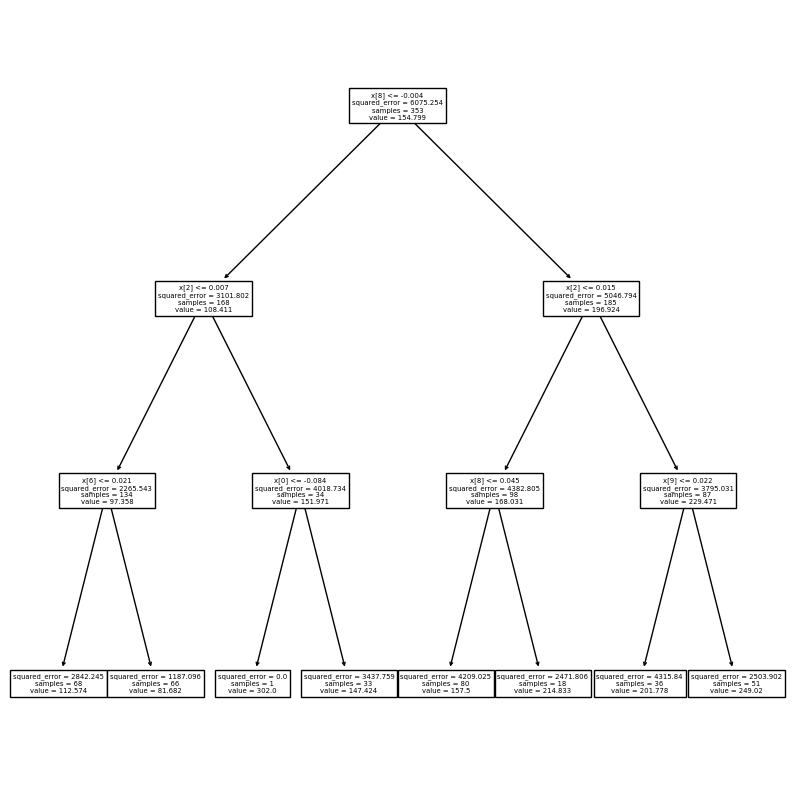

In [19]:
# Visualizamos el árbol ganador!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(grid.best_estimator_)

### Graficamos los resultamos estimados

3702.5082058700027
48.92419902928825
0.28980518080095086


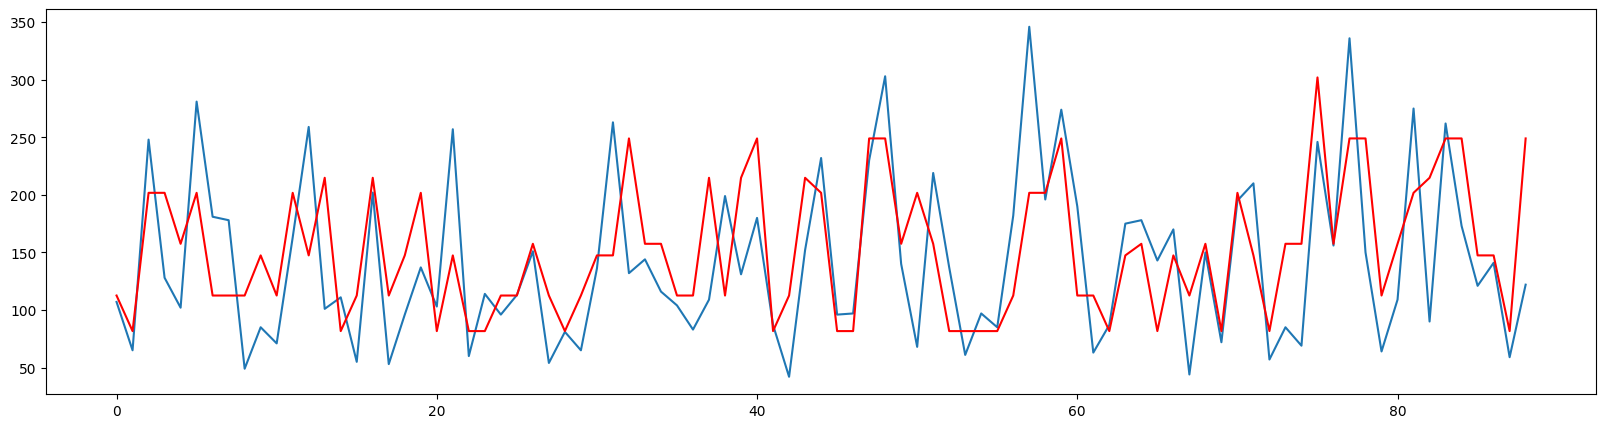

In [20]:
Yhat = grid.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Yhat, 'r')

In [21]:
np.unique(Yhat)

array([ 81.68181818, 112.57352941, 147.42424242, 157.5       ,
       201.77777778, 214.83333333, 249.01960784, 302.        ])

In [ ]:
Yhat

# CONCLUSIONES

Reflexiona sobre lo realizado y explica:

¿qué indica el árbol ganador? ¿por qué es un "ganador"?

¿que efectos tienen el manejar los hiperparámetros?

Comparte tus conclusiones con la clase.